In [1]:
import pandas as pd
import mplfinance as mpf
import talib

In [2]:
Query = """
Stop above EMA_51
"""

In [3]:
ohlc = pd.read_csv("../Src/xauusdm15.filtered.csv")
ohlc.head(3)

,DateTime,Open,High,Low,Close,Volume
0,2024-01-01 23:00:00,2064.593,2066.092,2063.301,2065.142,10
1,2024-01-01 23:15:00,2065.159,2065.900,2064.443,2064.698,15
2,2024-01-01 23:30:00,2064.664,2065.131,2063.634,2064.258,15


In [4]:
indigs = pd.DataFrame({
    "RSI_14": talib.RSI(ohlc['Close'], timeperiod=14),
    "EMA_21": talib.SMA(ohlc['Close'], timeperiod=20),
    "EMA_51": talib.EMA(ohlc['Close'], timeperiod=50),
})

indigs.head(3)

,RSI_14,EMA_21,EMA_51
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN


In [5]:
# Join side by side
dta = ohlc.join(indigs)

dta['DateTime'] = pd.to_datetime(dta['DateTime'])
dta = dta.set_index('DateTime')

dta.tail(3)


,Open,High,Low,Close,Volume,RSI_14,EMA_21,EMA_51
DateTime,,,,,,,,
2024-12-31 21:15:00,2624.003,2624.336,2623.478,2624.023,414,56.233516,2624.5355,2619.477743
2024-12-31 21:30:00,2624.028,2624.677,2623.825,2624.526,340,57.776547,2624.4619,2619.675714
2024-12-31 21:45:00,2624.570,2624.925,2624.043,2624.381,580,57.151027,2624.4112,2619.860235


In [6]:
def Chartter (df_show , apds ):
    mpf.plot(
        df_show,                   # DataFrame with Open, High, Low, Close, Volume
        type='candle',             # 'candle', 'ohlc', 'line', 'renko', 'pnf'
        style='charles',             # 'yahoo', 'charles', 'nightclouds', or custom dict
        addplot=apds,              # list of mpf.make_addplot()
        # volume=True,               # show volume subplot
        # volume_panel=2,            # put volume in panel 2 (0=main, 1=RSI, 2=volume)
        # figsize=(12, 8),           # (width, height) in inches
        title='My Chart Example',  # title above chart
        ylabel='Price',            # left y-axis label
        ylabel_lower='Volume',     # lower panel label
        xlabel='Date',             # x-axis label
        figratio=(16, 5),          # aspect ratio
        # figscale=1.2,              # scale figure size
        panel_ratios=(3,1),      # relative heights of panels (candles, RSI, volume)
        tight_layout=True,         # auto-fit layout
        datetime_format='%Y-%m-%d %H:%M',  # x-axis datetime formatting
        xrotation=20,              # rotate x-tick labels
        returnfig=False,           # True = return (fig, axes) instead of plotting
        warn_too_much_data=10000,  # suppress warning for large datasets
        update_width_config=dict(  # control candle/bar width
            candle_linewidth=1.0,
            candle_width=0.6,
            ohlc_linewidth=1.0,
            volume_linewidth=1.0
        )
    )


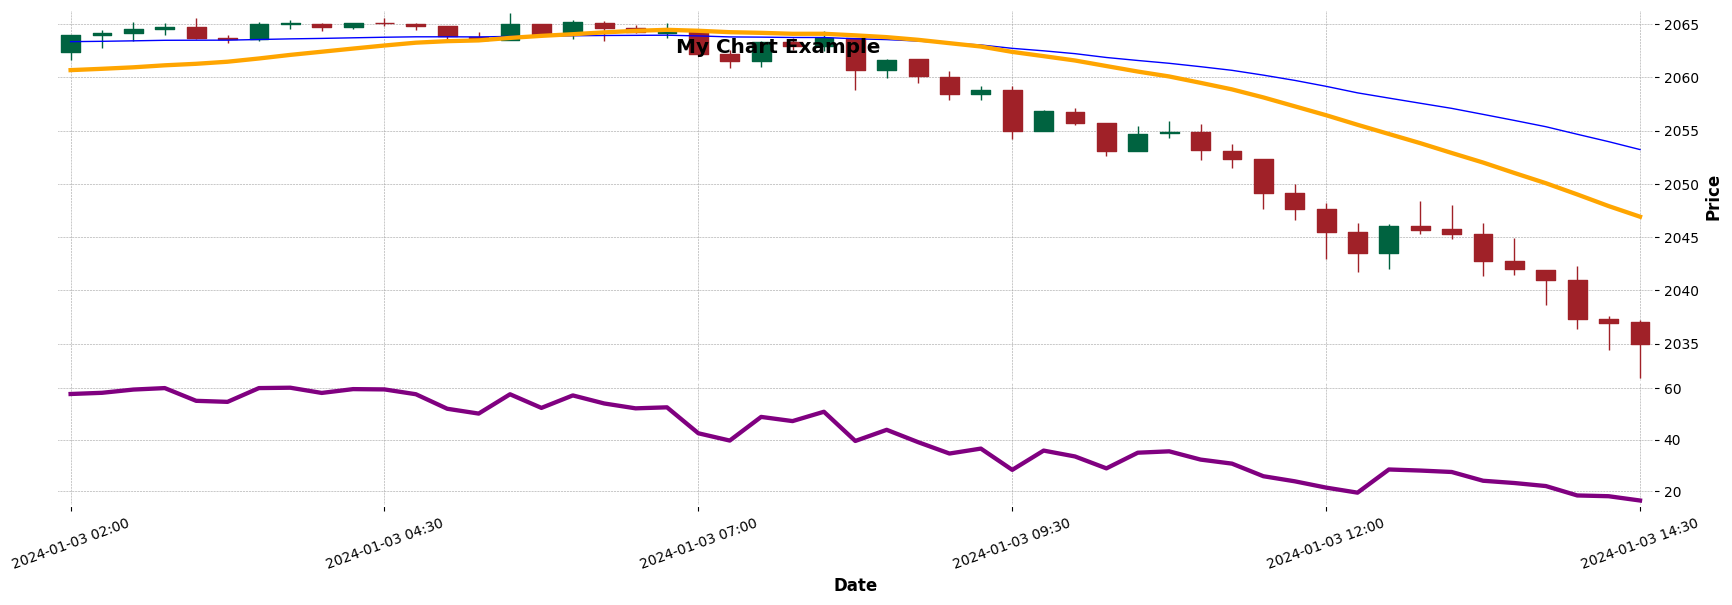

In [7]:
dta_show = dta.iloc[100:151]

apds = [
    mpf.make_addplot(
        dta_show['EMA_51'],               # Series or array-like (y-values)
        panel=0,            # which subplot (0=main chart, 1=below, etc.)
        color='blue',       # line or marker color
        type='line',        # 'line', 'scatter', 'bar'
        linestyle='-',      # '-', '--', '-.', ':'
        width=1.0,          # line thickness
        alpha=1.0,          # transparency (0-1)
        # secondary_y=False,  # plot against right-hand axis if True
        # scatter=False,      # shortcut for type='scatter'
        # markersize=10,      # size of scatter points
        # marker='o',         # scatter/line marker (o, x, ^, v, etc.)
        # ylabel='',          # label on y-axis
        # ylim=None,          # (min, max) for axis scaling
    ),
    mpf.make_addplot(dta_show['EMA_21'], color='orange'),
    mpf.make_addplot(dta_show['RSI_14'], panel=1, color='purple')  # panel=1 means separate subplot
]

Chartter(dta_show, apds);